<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1bxeggWagqZgCeawYWhB3pWK2TdCsJgIE?usp=sharing)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

#Langroid: Simplifies LLM-Powered Conversational Agents 🦜🔗

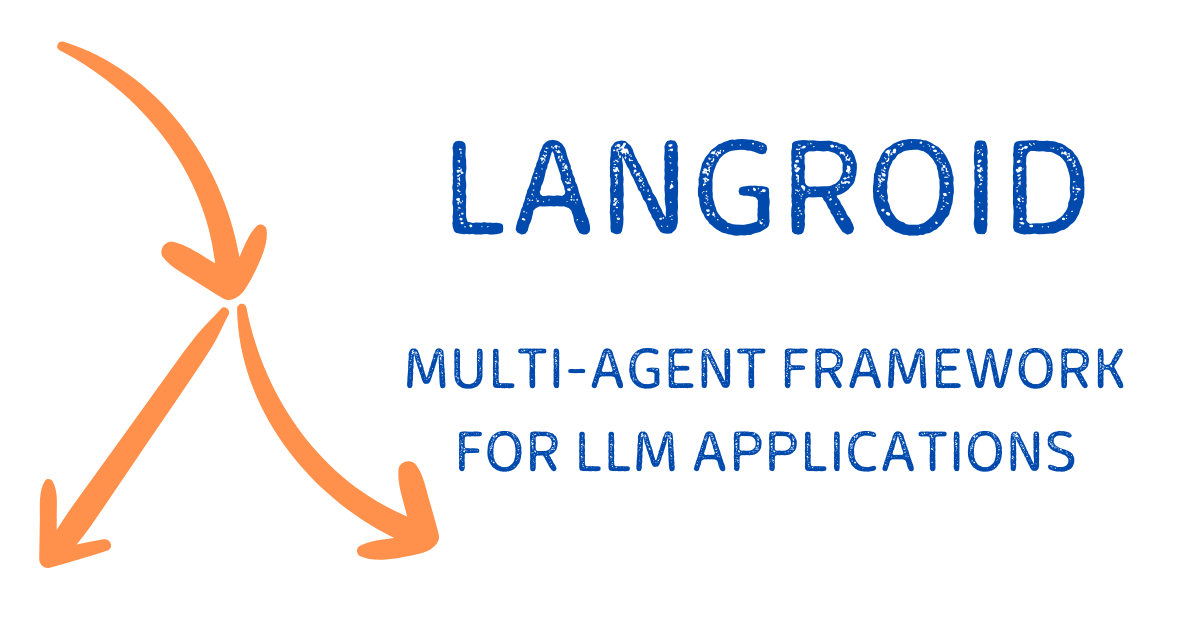

Langroid is a lightweight, flexible, and extensible Python library for building conversational AI applications.
It provides a structured and streamlined approach to creating interactive agents that leverage the power of
Large Language Models (LLMs) for natural and engaging conversations.

#✨ Key Features:

🤖 Agent-Centric Design:
    - Offers a core Agent class for building conversational entities, making it easier to reason about and manage complex interactions.

🧫 Modular Components:
    - Provides reusable components like Tool and Task for creating rich agent capabilities.

⚙️ Configurable LLM Handling:
    - Easily integrates with various LLMs (OpenAI, etc.) through a unified interface, with customizable parameters for controlling behavior.

🔗 Conversational State Management:
    - Provides tools to manage conversational state, allowing agents to remember context and maintain coherence across turns.

🧪 Tool Integration:
    - Facilitates seamless integration of external tools (e.g., search, calculator) into agents to enhance their functionality.

###**Setup and Installation**

In [ ]:
!pip install langroid

In [ ]:
import os
import logging
import nest_asyncio

logging.getLogger().setLevel(logging.ERROR)
nest_asyncio.apply()

from google.colab import userdata

os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

###**🚀 Direct Interaction with OpenAI LLM 🤖**

In [ ]:
import langroid as lr
llm = lr.language_models.OpenAIGPT()

from langroid.language_models import LLMMessage, Role

messages = [
    LLMMessage(content="You are a helpful assistant",  role=Role.SYSTEM),
    LLMMessage(content="What is the capital of Ontario?",  role=Role.USER),
]

response = llm.chat(messages, max_tokens=200)
print("LLM response is: ", response.message)


messages.append(response.to_LLMMessage())
messages.append(LLMMessage(content="what about India?", role=Role.USER))
response = llm.chat(messages, max_tokens=200)
print("LLM response is:", response.message)

The capital of Ontario is Toronto.

LLM response is:  The capital of Ontario is Toronto.

The capital of India is New Delhi.

LLM response is: The capital of India is New Delhi.



###**🚀 Create an Agent, Configure a Task & Execute It! 🎯**

In [ ]:
agent = lr.ChatAgent()

In [ ]:
agent.message_history.clear()
task = lr.Task(agent, name="Bot")
task.set_color_log(enable=False)
task.run()

>>> Starting Agent Bot (1) gpt-4o 

It seems like your message is missing some context or specific instructions. Could you please provide more details or clarify what you need help with?

Stats: N_MSG=2, TOKENS: in=11, out=27, max=8192, ctx=128000, COST: now=$0.0003, cumul=$0.0003, tot=$0.0003 (gpt-4o)

Human (respond or q, x to exit current level, or hit enter to continue)
:

q


Bye, hope this was useful!

<<< Finished Agent Bot (3) 

ChatDocument(content='q', metadata=ChatDocMetaData(source='User', is_chunk=False, id='73e0b712-d74f-4af1-9e65-d92fa3350ac1', window_ids=[], parent_id='a0a34cbc-7a55-485c-b075-425699542008', child_id='', agent_id='default=PydanticUndefined default_factory=<function Agent.<lambda> at 0x78c466cbf4c0> extra={}', msg_idx=-1, sender=<Entity.USER: 'User'>, oai_tool_id=None, tool_ids=[], block=None, sender_name='Bot', recipient='', usage=None, cached=False, displayed=False, has_citation=False, status=<StatusCode.USER_QUIT: 'USER_QUIT'>), reasoning='', content_any=None, oai_tool_calls=None, oai_tool_id2result=None, oai_tool_choice='auto', function_call=None, tool_messages=[], all_tool_messages=[], attachment=None)

###**Three communicating agents🤖**

In [ ]:
NO_ANSWER = lr.utils.constants.NO_ANSWER


In [ ]:
repeater_task = lr.Task(
    name = "Repeater",
    system_message="""
    Your job is to repeat whatever number you receive.
    """,
    llm_delegate=True,
    single_round=False,
)

In [ ]:
even_task = lr.Task(
    name = "EvenHandler",
    system_message=f"""
    You will be given a number.
    If it is even, divide by 2 and say the result, nothing else.
    If it is odd, say {NO_ANSWER}
    """,
    single_round=True,
)

In [ ]:
odd_task = lr.Task(
    name = "OddHandler",
    system_message=f"""
    You will be given a number n.
    If it is odd, return (n*3+1), say nothing else.
    If it is even, say {NO_ANSWER}
    """,
    single_round=True,
)

In [ ]:
repeater_task.add_sub_task([even_task, odd_task])
repeater_task.set_color_log(enable=False)
repeater_task.run("3")

>>> Starting Agent Repeater (1) gpt-4o 

3

Stats: N_MSG=2, TOKENS: in=11, out=2, max=8192, ctx=128000, COST: now=$0.0000, cumul=$0.0000, tot=$0.0003 (gpt-4o)

Human (respond or q, x to exit current level, or hit enter to continue)
:

...|>>> Starting Agent EvenHandler (1) gpt-4o 

...|

DO-NOT-KNOW

...|Stats: N_MSG=2, TOKENS: in=38, out=6, max=8192, ctx=128000, COST: now=$0.0002, cumul=$0.0002, tot=$0.0005 
(gpt-4o)

...|<<< Finished Agent EvenHandler (3) 

...|>>> Starting Agent OddHandler (1) gpt-4o 

...|

10

...|Stats: N_MSG=2, TOKENS: in=39, out=2, max=8192, ctx=128000, COST: now=$0.0001, cumul=$0.0001, tot=$0.0006 
(gpt-4o)

...|<<< Finished Agent OddHandler (3) 

Human (respond or q, x to exit current level, or hit enter to continue)
:

q


Bye, hope this was useful!

<<< Finished Agent Repeater (3) 

ChatDocument(content='q', metadata=ChatDocMetaData(source='User', is_chunk=False, id='e779ded9-4906-4920-9502-4fd732e20876', window_ids=[], parent_id='e97c5f6c-f644-4c86-81e4-529da8ed4347', child_id='', agent_id='default=PydanticUndefined default_factory=<function Agent.<lambda> at 0x78c466cbf4c0> extra={}', msg_idx=-1, sender=<Entity.USER: 'User'>, oai_tool_id=None, tool_ids=[], block=None, sender_name='Repeater', recipient='', usage=None, cached=False, displayed=False, has_citation=False, status=<StatusCode.USER_QUIT: 'USER_QUIT'>), reasoning='', content_any=None, oai_tool_calls=None, oai_tool_id2result=None, oai_tool_choice='auto', function_call=None, tool_messages=[], all_tool_messages=[], attachment=None)

###**🛠️ Simple Tool/Function-Calling Example 🚀**

In [ ]:
class ProbeTool(lr.agent.ToolMessage):
  request: str = "probe"
  purpose: str = """
        To find how many numbers in my list are less than or equal to
        the <number> you specify.
        """
  number: int

###**🕵️‍♂️ Defining the Agent**

In [ ]:
class SpyGameAgent(lr.ChatAgent):
  def __init__(self, config: lr.ChatAgentConfig = lr.ChatAgentConfig()):
    super().__init__(config)
    self.numbers = [3, 4, 8, 11, 15, 25, 40, 80, 90]

  def probe(self, msg: ProbeTool) -> str:
    return str(len([n for n in self.numbers if n <= msg.number]))

###**🕵️‍♂️ Setting Up the Spy Game Agent**

In [ ]:
spy_game_agent = SpyGameAgent()

spy_game_agent.enable_message(ProbeTool)

task = lr.Task(
        spy_game_agent,
        name="Spy",
        system_message="""
            I have a list of numbers between 1 and 20.
            Your job is to find the smallest of them.
            To help with this, you can give me a number and I will
            tell you how many of my numbers are equal or less than your number.
            Once you have found the smallest number,
            you can say DONE and report your answer.
        """,
    )

###**🕵️ Run the Spy Game Agent**

In [ ]:
spy_game_agent.message_history.clear()
task.set_color_log(enable=False)
task.run()